In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [9]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
dfGender = pd.read_csv('gender_submission.csv')

In [10]:
dfTrain.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
dfTrain.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

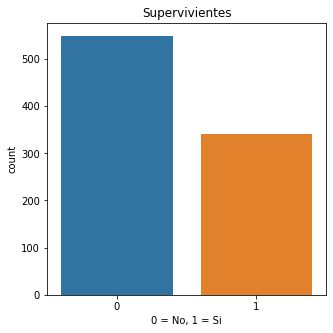

In [12]:
f, ac = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data = dfTrain)
plt.title('Supervivientes')
plt.xlabel('0 = No, 1 = Si')
plt.show()

In [13]:
supervivientes = np.sum(dfTrain.Survived)
noSupervivientes = dfTrain.shape[0] - supervivientes

In [14]:
supervivientes/dfTrain.shape[0]

0.3838383838383838

In [15]:
noSupervivientes/dfTrain.shape[0]

0.6161616161616161

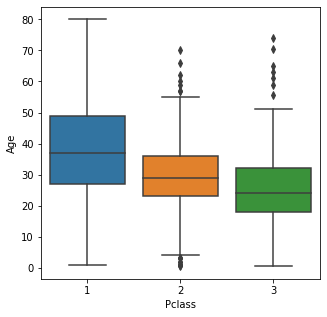

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data = dfTrain)

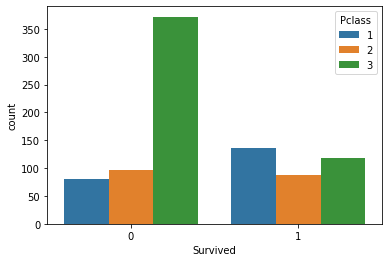

In [17]:
sns.countplot(x='Survived', hue='Pclass', data = dfTrain)
plt.show()

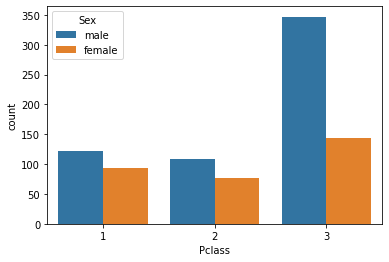

In [18]:
sns.countplot(x='Pclass', hue='Sex', data = dfTrain)
plt.show()

In [19]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df = dfTrain.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis = 1)

In [21]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [22]:
genders = {'male':0, 'female':1}

data = [df]
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [25]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [27]:
df.Embarked.isnull().sum()

2

In [29]:
common_value = 'S'
data = [df]

for dataset in data:
  dataset.Embarked = dataset.Embarked.fillna(common_value)

In [30]:
ports = {'S':0, 'C':1, 'Q':2}
data = [df]

for dataset in data:
  dataset.Embarked = dataset.Embarked.map(ports)

In [31]:
for dataset in data:
  dataset.loc[dataset.Fare <= 10, 'Fare'] = 0
  dataset.loc[(dataset.Fare > 10) & (dataset.Fare <= 20), 'Fare'] = 1
  dataset.loc[(dataset.Fare > 20) & (dataset.Fare <= 30), 'Fare'] = 2
  dataset.loc[(dataset.Fare > 30) & (dataset.Fare <= 100), 'Fare'] = 3
  dataset.loc[(dataset.Fare > 100) & (dataset.Fare <= 250), 'Fare'] = 4
  dataset.loc[dataset.Fare > 250,'Fare'] = 5
  dataset.Fare = dataset.Fare.astype(int)

In [32]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [33]:
x_data = df.drop('Survived', axis = 1)
y_survived = df.Survived

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_survived, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

In [40]:
y_predict = logmodel.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test, y_predict)

array([[131,  26],
       [ 32,  79]])

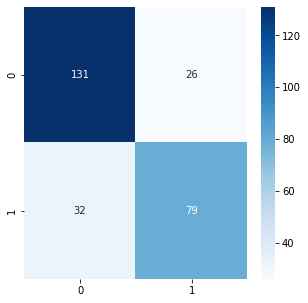

In [44]:
plt.figure(figsize = (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.71      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [47]:
df.to_csv('titanic_clean.csv', header=True)